In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Getting the Data

In [2]:
import csv
import urllib.request as urllib2
from collections import namedtuple

# Create a namedtuple constructor for each record in the Iris data
#    1. sepal length in cm
#    2. sepal width in cm
#    3. petal length in cm
#    4. petal width in cm
#    5. class: 
#       -- Iris-setosa
#       -- Iris-versicolour
#       -- Iris-virginica
fields = ('sepal_length', 
          'sepal_width', 
          'petal_length', 
          'petal_width', 
          'species')
IrisRecord = namedtuple('IrisRecord', fields)

# Download and read in the data from the UCI Machine Learning Repository
response = urllib2.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
iris_data_csv = response.read().decode('utf-8').strip()

# Convert each record into a format that's easier to work with (i.e.,
# wrap each record in the namedtuple that we created).
data = []
for row in csv.reader(iris_data_csv.splitlines()):
    data.append(IrisRecord(
        sepal_length          = float(row[0]),
        sepal_width           = float(row[1]),
        petal_length          = float(row[2]),
        petal_width           = float(row[3]),
        species               = row[4]))

## Creating the `scatter` Function

In [3]:
from itertools import cycle
from collections import defaultdict

def scatter(m, x=None, y=None, target=None, x_label=None, y_label=None, loc='upper right'):
    """Takes a 2D matrix and keys for getting the x and y values
    
    The x, y, and target parameters are either getter functions 
    that will be used to extract their corresponding values from
    each row, or they are strings which will be used with the
    getattr function to extract the value. If None, it is assumed
    that the x and y values are the first and second in the row
    and the target value is the last value in the row.
    """        
    # Create a color map of species names to colors
    color_cycler = cycle(plt.rcParams['axes.prop_cycle'])
    cmap = defaultdict(lambda: next(color_cycler)['color'])
    
    # Create the x, y, and target values getter functions,
    # and create human readable x and y labels if none 
    # were passed in.
    if x is None:
        x_getter = lambda r: r[0]
    elif isinstance(x, str):
        if x_label is None:
            x_label = x.replace('_', ' ').title()
        x_getter = lambda r: getattr(r, x) 
    else:
        x_getter = x
        
    if y is None:
        y_getter = lambda r: r[1]
    elif isinstance(y, str):
        if y_label is None:
            y_label = y.replace('_', ' ').title()
        y_getter = lambda r: getattr(r, y) 
    else:
        y_getter = y
        
    if target is None:
        target_getter = lambda r: r[-1]
    elif isinstance(target, str):
        target_getter = lambda r: getattr(r, target)
    else:
        target_getter = target
    
    # Extract the x and y values (i.e., sepal length and width)
    # from the data set. Also, create a list of corresponding
    # colors based on the species of each record.
    _x, _y, colors = [], [], []
    for r in data:
        _x.append(x_getter(r))
        _y.append(y_getter(r))
        colors.append(cmap[target_getter(r)])

    # Plot the data on a scatter plot. Each point will have an outline 
    # color according to their species, but we'll leave the centers 
    # colorless (for aesthetic purposes only). Finally, we'll reduce
    # the line width of each data point (again for aesthetics only).
    plt.scatter(_x, _y, edgecolors=colors, c='none', linewidths=0.5)

    # Add x and y labels
    if x_label is not None:
        plt.xlabel(x_label)
    if y_label is not None:
        plt.ylabel(y_label)
    
    # Get the list of classes for the target variable
    classes = list(set(r[-1] for r in m))

    # Create a few "proxy artists" for creating the legend. Calling the 
    # legend() function without passing in any parameters will create a
    # legend for any labeled data in the graph, so we could do something
    # funky where we add a label for one line per species, but that 
    # doesn't seem as simple and clean as just creating a few lines that
    # we use just to create the legend. Plus, this is an officially 
    # sanctioned way to create a legend (just see the legend docs).
    legend_handles = [plt.Line2D([], [], color=cmap[cls], label=cls) for cls in classes]
    plt.legend(handles=legend_handles, loc=loc);

## Drawing Multiple Plots With `subplot`

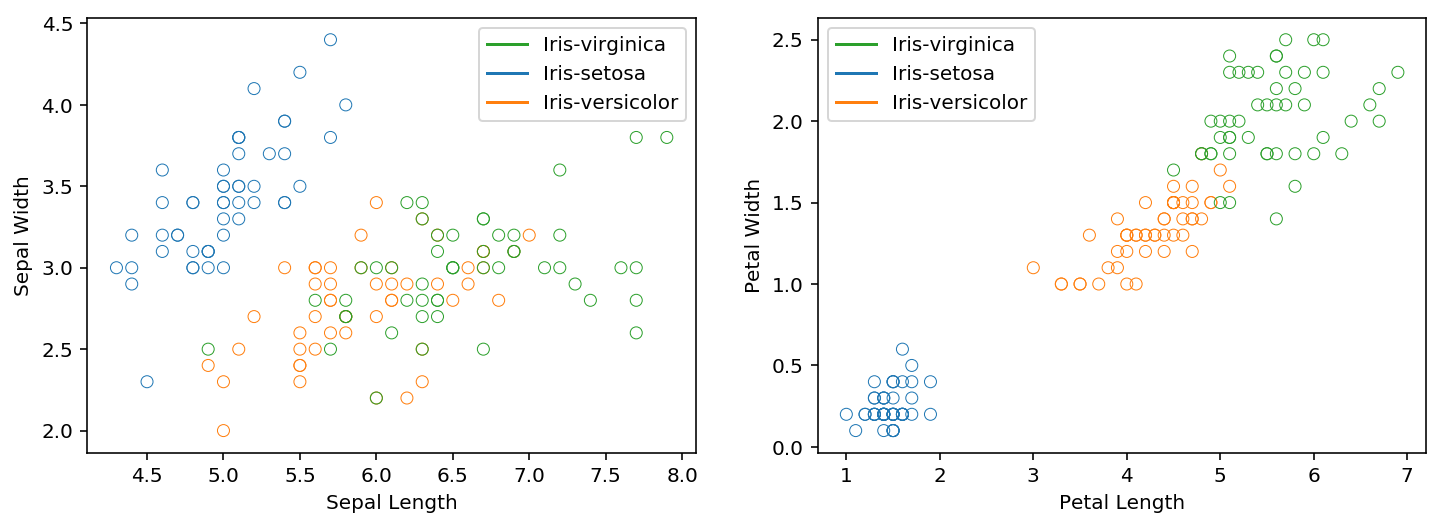

In [4]:
# Adjust the width to fit two plots side-by-side
plt.gcf().set_figwidth(12)

# Create the first plot in a 1x2 grid
plt.subplot(1, 2, 1)
scatter(data, 'sepal_length', 'sepal_width')

# Create the second plot in a 1x2 grid.
# For grids that have less than 10 subplots, you can use
# the shorthand below where you leave out the commas between
# the number of rows, number of columns, and index values.
plt.subplot(122)
scatter(data, 'petal_length', 'petal_width', loc='upper left')

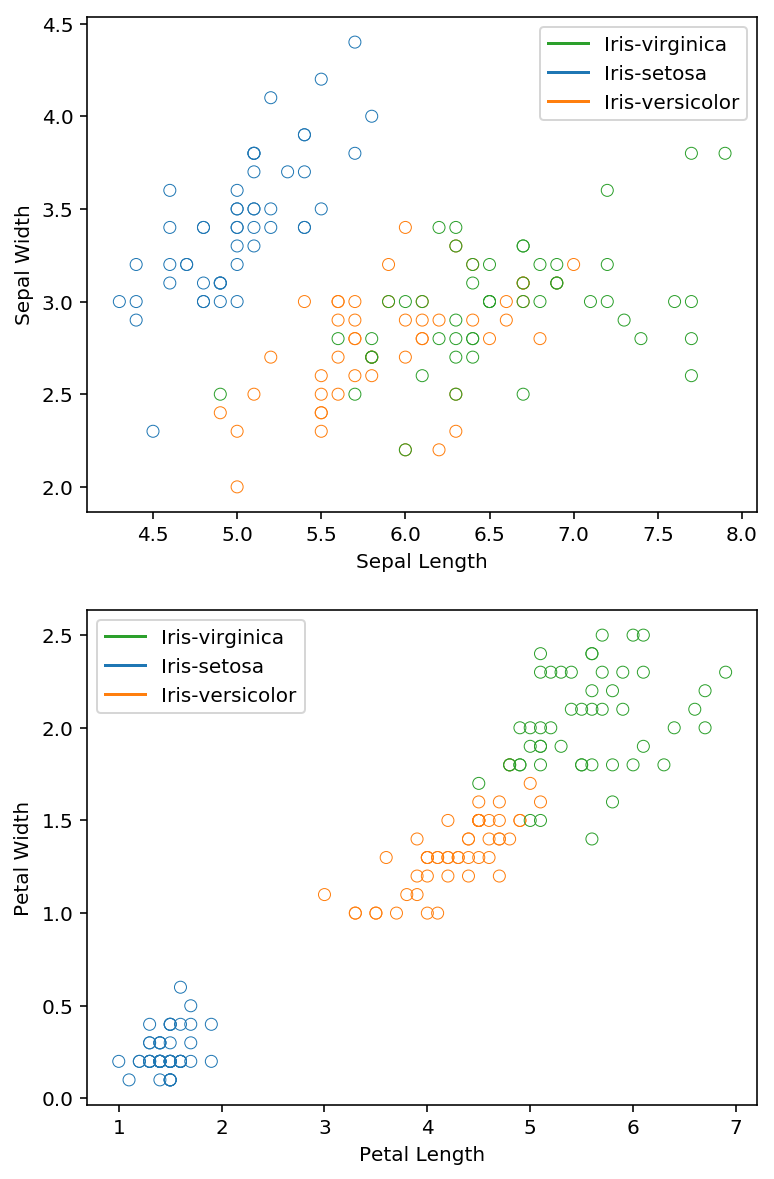

In [5]:
# The difference between the subplot and subplots
# functions is that the former creates a single 
# axes object every time it's called, whereas the
# the latter creates all of the axes objects at once.
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)

# Since we created all of the xes objects ahead of time, 
# we have to set the current axes ourselves before calling
# the scatter function. Below we set the current axes to 
# the first Axes object before plotting the sepal dimensions.
plt.sca(ax1)
scatter(data, 'sepal_length', 'sepal_width', loc='upper right')

# Plot the petal dimensions in the second axes
plt.sca(ax2)
scatter(data, 'petal_length', 'petal_width', loc='upper left')